## ARFF File Parser

### Imports

In [ ]:
import sys
sys.path.append('./py_files')

In [2]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Task 1 - Load Data - SciPy

In [35]:
from helper_funcs import *

In [33]:
FILE_NAME = 'iris.arff'

In [34]:
df = load_dataset(FILE_NAME)

NameError: name 'load_dataset' is not defined

In [6]:
FILE_NAME = 'iris.arff'
raw_data = loadarff(FILE_NAME)
df = pd.DataFrame(raw_data[0])
df_class = df['class'].copy().str.decode('utf-8')
df['class'] = df_class
#df_vals = df.drop(columns=['class'],axis=1, inplace=False)

### EDA

In [8]:
df.groupby('class').mean()

,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [10]:
# looking at the data
df.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

In [114]:
# we can look at the description of the dataset 
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [115]:
#looking for empty values or NaNs
assert df.isnull().sum().all() == df.isna().sum().all()
print("No missing values")

No missing values


In [116]:
#decode bytestring into ordinary string 
df['class'] = df['class'].str.decode('utf-8')

In [117]:
#let's look at the different classes - count
df.groupby('class').count()

,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [118]:
#let's look at the different classes -  mean
df.groupby('class').mean()

,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


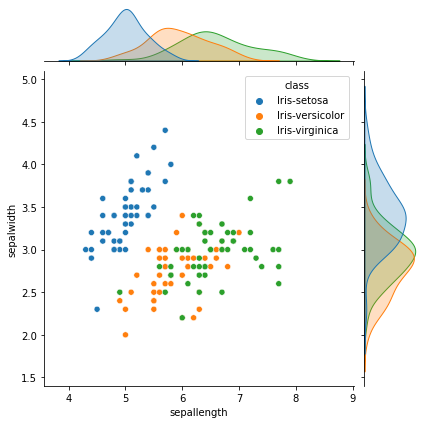

In [119]:
# we can also see a graphical difference between them
sns.jointplot(data=df, x='sepallength',y='sepalwidth',hue='class');

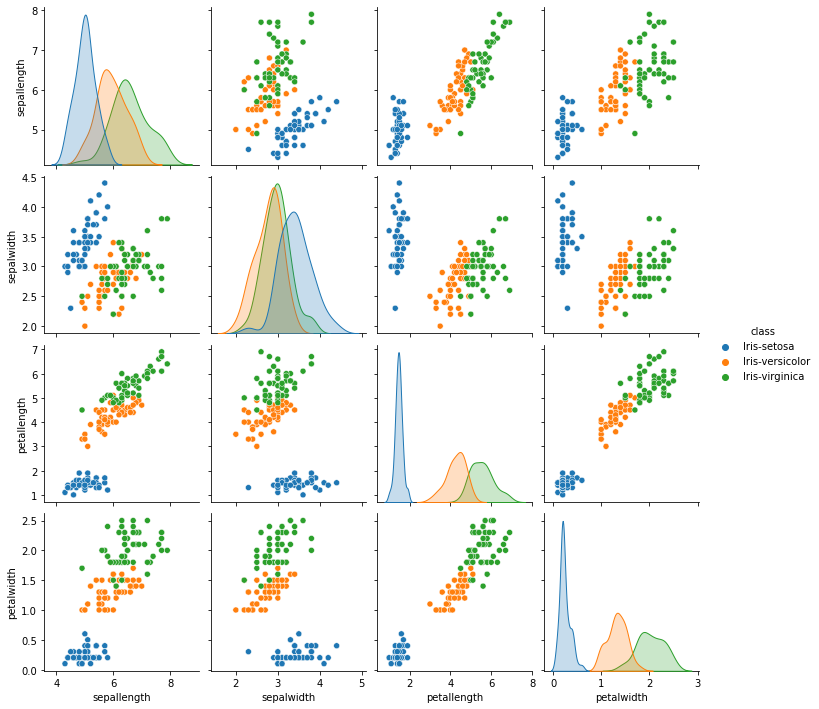

In [120]:
sns.pairplot(df, hue='class');

### Preprocessing 

In [122]:
# we use the sklearn preprocessing package 
from sklearn.preprocessing import StandardScaler

In [110]:
# We standardize the data we can either: 
# Normalize or Standardize 
# we can use the Standard Scaler 
scaler = StandardScaler()

In [124]:
X_vals = df_vals.to_numpy()

In [132]:
X_vals.shape

(150, 4)

In [136]:
#fitting the scaler to the data 
X_scaled = scaler.fit_transform(X_vals)

In [142]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### Evaluation

### Model Generation